# Tennis Ace 
The used for this model is from the Association of Tennis Professionals, got from Codecademy course.

The statistics recorded for each player in each year, from 2009 to 2017, wich includes service game (offensive) statistics, return game (defensive) statistics and outcomes are loaded into the csv 'tennis_stats'.

Below there are some information about the features:

### Identifying Data
Player: name of the tennis player\
Year: year data was recorded
### Service Game Columns (Offensive)
Aces: number of serves by the player where the receiver does not touch the ball \
DoubleFaults: number of times player missed both first and second serve attempts \
FirstServe: % of first-serve attempts made \
FirstServePointsWon: % of first-serve attempt points won by the player \
SecondServePointsWon: % of second-serve attempt points won by the player \
BreakPointsFaced: number of times where the receiver could have won service game of the player \
BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance \
ServiceGamesPlayed: total number of games where the player served \
ServiceGamesWon: total number of games where the player served and won \
TotalServicePointsWon: % of points in games where the player served that they won 
### Return Game Columns (Defensive)
FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win \
SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win \
BreakPointsOpportunities: number of times where the player could have won the service game of the opponent \
BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance \
ReturnGamesPlayed: total number of games where the player’s opponent served \
ReturnGamesWon: total number of games where the player’s opponent served and the player won \
ReturnPointsWon: total number of points where the player’s opponent served and the player won \
TotalPointsWon: % of points won by the player 
### Outcomes 
Wins: number of matches won in a year \
Losses: number of matches lost in a year \
Winnings: total winnings in USD($) in a year \
Ranking: ranking at the end of year 



In [22]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
#packages needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exploring the dataset

In [24]:
# Reading the dataset
df = pd.read_csv('tennis_stats.csv')

# Amout of rows and columns in the dataset
print('Amount of rows and columns in the dataset:\n' \
'Rows: ', df.shape[0], '\nColumns:', df.shape[1])

Amount of rows and columns in the dataset:
Rows:  1721 
Columns: 24


In [25]:

#evaluating the datatype of each column
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object


In [26]:

#Checking for null values
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64


There is no null data in the dataset and all the features related to the feature are quantitative, wich makes the data suitable for Linear Regression Model.

An exploratory data analysis with an investigation into the linear relationships between the variables becomes more suitable in order to identify a variable.

In [27]:
# Print some rowes of the dataset
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


Multicoliearity must be avoided in Linear Regression models in order to isolate variables that relates do each ocher linearly, because the presence of those in the model can product an inefficient model, that is a model with uninstable coefficients and high p-values.

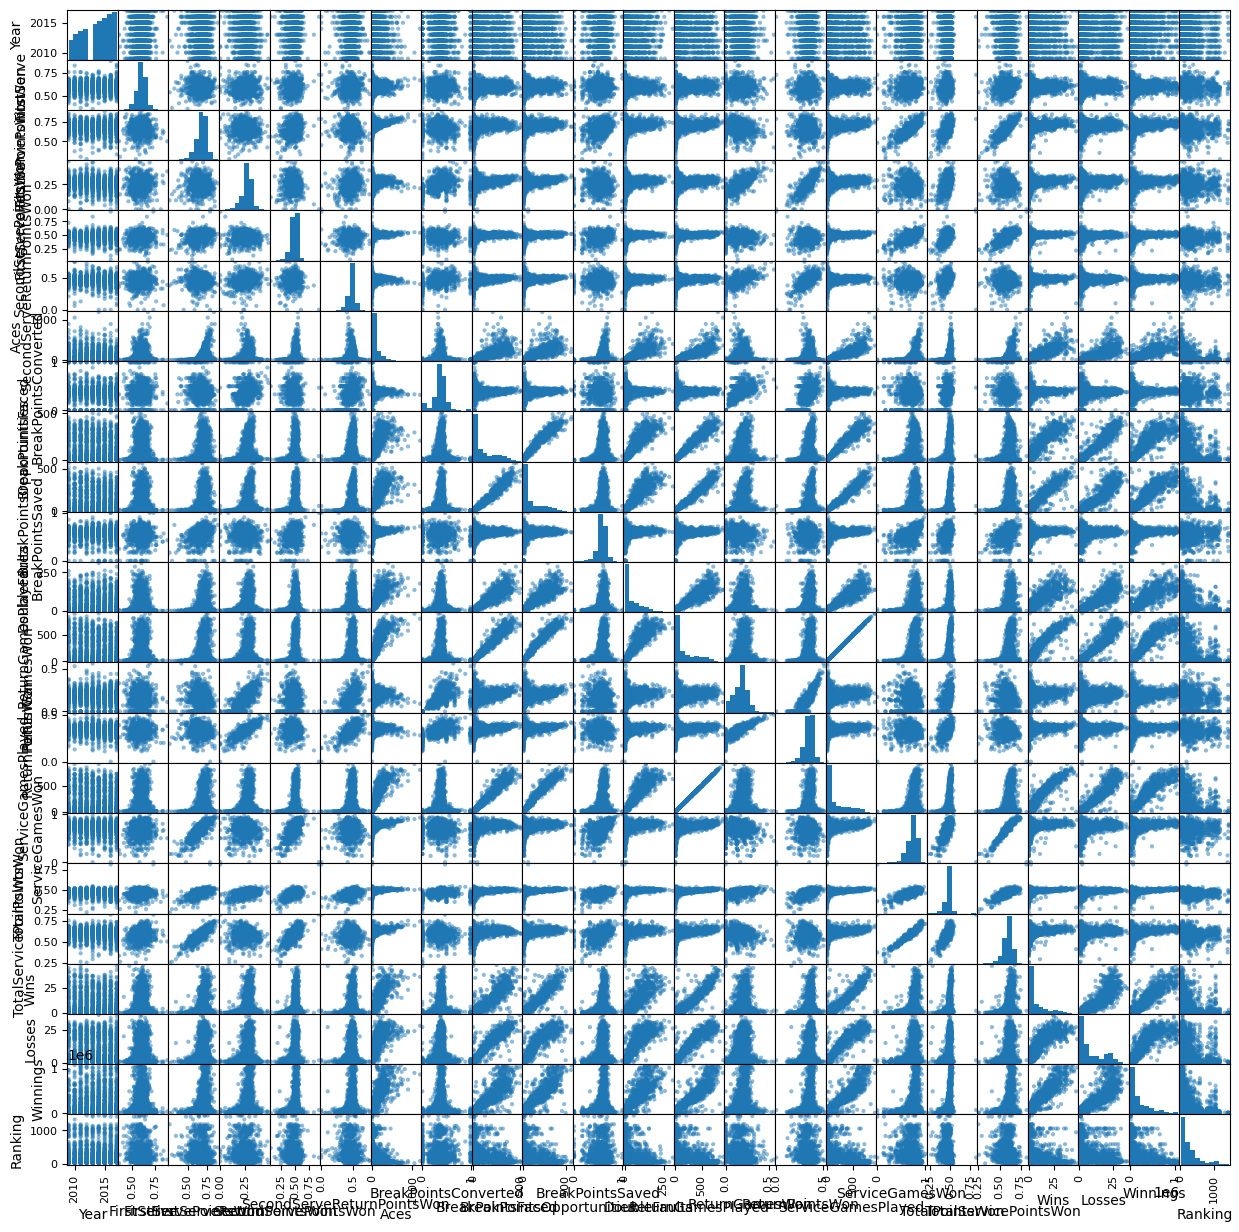

In [28]:
pd.plotting.scatter_matrix(df, figsize=(15, 15), diagonal='hist')
plt.show()

The image above make it difficult to identity which features have a high correlation, in order so isolate themm, the code below select the ones wich at least a correlation of 0.8

In [56]:
df_corr = df.drop(columns=['Player'])   
corr_matrix = df_corr.corr()
threshold = 0.8
high_corr_pairs = [
    (corr_matrix.columns[i], corr_matrix.columns[j])
    for i in range(len(corr_matrix.columns))
    for j in range(i+1, len(corr_matrix.columns))
    if abs(corr_matrix.iloc[i, j]) > threshold
]
# Visualizing the the highly correlated pairs
print("\nHighly correlated pairs (correlation > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]:.2f}")
high_corr_vars = set([var for pair in high_corr_pairs for var in pair])
print("\nVariables with high correlation (correlation > 0.8):")
print(high_corr_vars)
# quantity of highly correlated variables
print("\nQuantity of highly correlated variables:", len(high_corr_vars))
# Cleaning the dataset by removing highly correlated variables
df_cleaned = df.drop(columns=list(high_corr_vars) + ['Player'])
df_cleaned_08 = df_cleaned # For feature selection in the model
print("\nCleaned dataset shape:", df_cleaned.shape)
not_high_corr_vars = df_cleaned.columns.to_list()
print("\nVariables without high correlation:")
print(not_high_corr_vars)


Highly correlated pairs (correlation > 0.8):
FirstServePointsWon and ServiceGamesWon: 0.82
FirstServePointsWon and TotalServicePointsWon: 0.86
FirstServeReturnPointsWon and ReturnPointsWon: 0.83
Aces and DoubleFaults: 0.82
Aces and ReturnGamesPlayed: 0.86
Aces and ServiceGamesPlayed: 0.87
Aces and Wins: 0.83
BreakPointsFaced and BreakPointsOpportunities: 0.97
BreakPointsFaced and DoubleFaults: 0.92
BreakPointsFaced and ReturnGamesPlayed: 0.97
BreakPointsFaced and ServiceGamesPlayed: 0.97
BreakPointsFaced and Wins: 0.88
BreakPointsFaced and Losses: 0.94
BreakPointsFaced and Winnings: 0.88
BreakPointsOpportunities and DoubleFaults: 0.91
BreakPointsOpportunities and ReturnGamesPlayed: 0.98
BreakPointsOpportunities and ServiceGamesPlayed: 0.98
BreakPointsOpportunities and Wins: 0.92
BreakPointsOpportunities and Losses: 0.91
BreakPointsOpportunities and Winnings: 0.90
DoubleFaults and ReturnGamesPlayed: 0.93
DoubleFaults and ServiceGamesPlayed: 0.93
DoubleFaults and Wins: 0.85
DoubleFaults

Another way to check the correlation of features is with Variance Inflation Factor, Statsmodels package offer a class that can interpret the features with high correlation.

In [78]:
# VIF calculation for all features
X = df_corr.values
vif_data = pd.DataFrame()
vif_data["variavel"] = df_corr.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
first_3_all_features = vif_data.sort_values(by="VIF", ascending=True).iloc[0:3].reset_index(drop=True)
first_3_all_features = first_3_all_features.loc[:, 'variavel']
first_5_all_features = vif_data.sort_values(by="VIF", ascending=True).iloc[0:6].reset_index(drop=True)
first_5_all_features = first_5_all_features.loc[:, 'variavel']
# Remove 'Aces' from the features if present
first_5_all_features = first_5_all_features[first_5_all_features != 'Aces']
first_10_all_features = vif_data.sort_values(by="VIF", ascending=True).iloc[0:11].reset_index(drop=True)
first_10_all_features = first_10_all_features.loc[:, 'variavel']
# Remove 'Aces' from the features if present
first_10_all_features = first_10_all_features[first_10_all_features != 'Aces']
print(vif_data.sort_values(by="VIF", ascending=True))

                      variavel           VIF
22                     Ranking      2.352023
7         BreakPointsConverted     10.442397
21                    Winnings     14.799407
11                DoubleFaults     15.496227
6                         Aces     17.868571
19                        Wins     19.154464
20                      Losses     28.192529
13              ReturnGamesWon     38.288858
10            BreakPointsSaved     41.197792
9     BreakPointsOpportunities    102.744328
8             BreakPointsFaced    115.042222
3    FirstServeReturnPointsWon    217.287337
5   SecondServeReturnPointsWon    295.205498
16             ServiceGamesWon    391.303274
1                   FirstServe    457.726120
0                         Year    867.498701
4         SecondServePointsWon    939.006285
14             ReturnPointsWon   1162.457585
17              TotalPointsWon   3007.529360
2          FirstServePointsWon   3982.480884
15          ServiceGamesPlayed   6617.975825
12        

In [59]:
# VIF calculation for cleaned features with 0.8 correlation threshold
X = df_cleaned.values
vif_data = pd.DataFrame()
vif_data["variavel"] = df_cleaned.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=True))

                     variavel         VIF
7                     Ranking    2.111482
4        BreakPointsConverted    7.008386
5            BreakPointsSaved   31.087303
3  SecondServeReturnPointsWon   62.404437
2        SecondServePointsWon   90.839515
1                  FirstServe  125.237718
0                        Year  281.726780
6              TotalPointsWon  418.193343


After an evaluation with VIF, the features selected still do not have an acceptable multicolinearity.

A change in the threshold of the correlation may produce better insights for features selection.

In [60]:
# Checking for multicollinearity using correlation matrix with a threshold of 0.7
df_corr = df.drop(columns=['Player'])   
corr_matrix = df_corr.corr()
threshold = 0.70
high_corr_pairs = [
    (corr_matrix.columns[i], corr_matrix.columns[j])
    for i in range(len(corr_matrix.columns))
    for j in range(i+1, len(corr_matrix.columns))
    if abs(corr_matrix.iloc[i, j]) > threshold
]

high_corr_vars = set([var for pair in high_corr_pairs for var in pair])
print("\nVariables with high correlation (correlation > 0.7):")
print(high_corr_vars)
# quantity of highly correlated variables
print("\nQuantity of highly correlated variables:", len(high_corr_vars))

# Cleaning the dataset by removing highly correlated variables
df_cleaned = df.drop(columns=list(high_corr_vars) + ['Player'])
df_cleaned_07 = df_cleaned  # For feature selection in the model
not_high_corr_vars = df_cleaned.columns.to_list()
not_high_corr_vars

X = df_corr.values
vif_data = pd.DataFrame()
vif_data["variavel"] = df_corr.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=True))
# VIF calculation for cleaned features with 0.7 correlation threshold
X = df_cleaned.values
vif_data = pd.DataFrame()
vif_data["variavel"] = df_cleaned.columns
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("\nVIF for cleaned features with 0.7 correlation threshold:")
print(vif_data.sort_values(by="VIF", ascending=True))


Variables with high correlation (correlation > 0.7):
{'Wins', 'TotalPointsWon', 'TotalServicePointsWon', 'SecondServeReturnPointsWon', 'ServiceGamesPlayed', 'Winnings', 'ReturnGamesWon', 'DoubleFaults', 'Losses', 'ServiceGamesWon', 'FirstServeReturnPointsWon', 'Aces', 'BreakPointsOpportunities', 'FirstServePointsWon', 'ReturnPointsWon', 'BreakPointsFaced', 'ReturnGamesPlayed', 'SecondServePointsWon'}

Quantity of highly correlated variables: 18
                      variavel           VIF
22                     Ranking      2.352023
7         BreakPointsConverted     10.442397
21                    Winnings     14.799407
11                DoubleFaults     15.496227
6                         Aces     17.868571
19                        Wins     19.154464
20                      Losses     28.192529
13              ReturnGamesWon     38.288858
10            BreakPointsSaved     41.197792
9     BreakPointsOpportunities    102.744328
8             BreakPointsFaced    115.042222
3    First

The values are closer to VIF acceptable range, less than 10.

After the of smaller threshold than 0.7 they kept the same.

After the exploration of multicolinearity, we have more valuable information that will help  chosing the features for the Linear models.

In [61]:
# First Linear Regression Model

# Only 1 feature, the one with the lowest VIF: # ranking
# Splitting the dataset into training and testing sets

X = df[['Ranking']].values
y = df['Aces'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression() 
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)  

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nTraining and Testing the Linear Regression Model with 1 feature (Ranking):")
print(f"Train Score: {model.score(X_train, y_train):.2f}")
print(f"Test Score: {model.score(X_test, y_test):.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Training and Testing the Linear Regression Model with 1 feature (Ranking):
Train Score: 0.07
Test Score: 0.08
Mean Squared Error: 20979.42
R-squared: 0.08


In [62]:
# Second Linear Regression Model

# 2 features, the ones with the lowest VIF: # ranking and # BreakPointsConverted
# Splitting the dataset into training and testing sets

X = df[['Ranking', 'BreakPointsConverted']].values
y = df['Aces'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression() 
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)  

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nTraining and Testing the Linear Regression Model with 1 feature (Ranking):")
print(f"Train Score: {model.score(X_train, y_train):.2f}")
print(f"Test Score: {model.score(X_test, y_test):.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Training and Testing the Linear Regression Model with 1 feature (Ranking):
Train Score: 0.08
Test Score: 0.08
Mean Squared Error: 21018.08
R-squared: 0.08


In [63]:
# Third Linear Regression Model

# All Cleaned Features for 0.8 correlation threshold
# Splitting the dataset into training and testing sets

print("\nAll Cleaned Features for 0.8 correlation threshold:")
print(df_cleaned_08.columns.tolist())

X = df[df_cleaned_08.columns].values
y = df['Aces'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression() 
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)  

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nTraining and Testing the Linear Regression Model with 1 feature (Ranking):")
print(f"Train Score: {model.score(X_train, y_train):.2f}")
print(f"Test Score: {model.score(X_test, y_test):.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


All Cleaned Features for 0.8 correlation threshold:
['Year', 'FirstServe', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'BreakPointsConverted', 'BreakPointsSaved', 'TotalPointsWon', 'Ranking']

Training and Testing the Linear Regression Model with 1 feature (Ranking):
Train Score: 0.24
Test Score: 0.24
Mean Squared Error: 17460.52
R-squared: 0.24


In [64]:
# Fourth Linear Regression Model

# All Cleaned Features for 0.7 correlation threshold
# Splitting the dataset into training and testing sets

print("\nAll Cleaned Features for 0.7 correlation threshold:")
print(df_cleaned_07.columns.tolist())

X = df[df_cleaned_07.columns].values
y = df['Aces'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression() 
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)  

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nTraining and Testing the Linear Regression Model with 1 feature (Ranking):")
print(f"Train Score: {model.score(X_train, y_train):.2f}")
print(f"Test Score: {model.score(X_test, y_test):.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


All Cleaned Features for 0.7 correlation threshold:
['Year', 'FirstServe', 'BreakPointsConverted', 'BreakPointsSaved', 'Ranking']

Training and Testing the Linear Regression Model with 1 feature (Ranking):
Train Score: 0.16
Test Score: 0.15
Mean Squared Error: 19498.24
R-squared: 0.15


In [70]:
# Fifth Linear Regression Model

# First 3 features for the evaluation of VIF for all features
# Splitting the dataset into training and testing sets

print("\nFirst 3 features for the VIF of full database:")
print(first_3_all_features.tolist())

X = df[first_3_all_features].values
y = df['Aces'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression() 
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)  

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nTraining and Testing the Linear Regression Model with 1 feature (Ranking):")
print(f"Train Score: {model.score(X_train, y_train):.2f}")
print(f"Test Score: {model.score(X_test, y_test):.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


First 3 features for the VIF of full database:
['Ranking', 'BreakPointsConverted', 'Winnings']

Training and Testing the Linear Regression Model with 1 feature (Ranking):
Train Score: 0.65
Test Score: 0.61
Mean Squared Error: 8942.85
R-squared: 0.61


In [ ]:
# sixth Linear Regression Model

# First 5 features for the evaluation of VIF for all features
# Splitting the dataset into training and testing sets

print("\nFirst 5 features for the VIF of full database:")
print(first_5_all_features.tolist())

X = df[first_5_all_features].values
y = df['Aces'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression() 
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)  

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nTraining and Testing the Linear Regression Model with 1 feature (Ranking):")
print(f"Train Score: {model.score(X_train, y_train):.2f}")
print(f"Test Score: {model.score(X_test, y_test):.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


First 5 features for the VIF of full database:
['Ranking', 'BreakPointsConverted', 'Winnings', 'DoubleFaults', 'Wins']

Training and Testing the Linear Regression Model with 1 feature (Ranking):
Train Score: 0.75
Test Score: 0.68
Mean Squared Error: 7255.72
R-squared: 0.68


In [79]:
# Seventh Linear Regression Model

# First 10 features for the evaluation of VIF for all features
# Splitting the dataset into training and testing sets

print("\nFirst 10 features for the VIF of full database:")
print(first_10_all_features.tolist())

X = df[first_10_all_features].values
y = df['Aces'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression() 
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)  

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nTraining and Testing the Linear Regression Model with 1 feature (Ranking):")
print(f"Train Score: {model.score(X_train, y_train):.2f}")
print(f"Test Score: {model.score(X_test, y_test):.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


First 10 features for the VIF of full database:
['Ranking', 'BreakPointsConverted', 'Winnings', 'DoubleFaults', 'Wins', 'Losses', 'ReturnGamesWon', 'BreakPointsSaved', 'BreakPointsOpportunities', 'BreakPointsFaced']

Training and Testing the Linear Regression Model with 1 feature (Ranking):
Train Score: 0.78
Test Score: 0.74
Mean Squared Error: 5969.73
R-squared: 0.74
